In [1]:
import pandas as pd

user_activity = pd.read_csv('data/app_users.csv', index_col = [0])
user_activity.head()

,visit_per_month,use_time
0,14,22.8
1,32,13.6
2,8,3.1
3,13,5.7
4,19,20.8


C:\Users\youji\AppData\Local\Temp\ipykernel_20212\569704156.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, s=100, palette='bright')


<Axes: xlabel='visit_per_month', ylabel='use_time'>

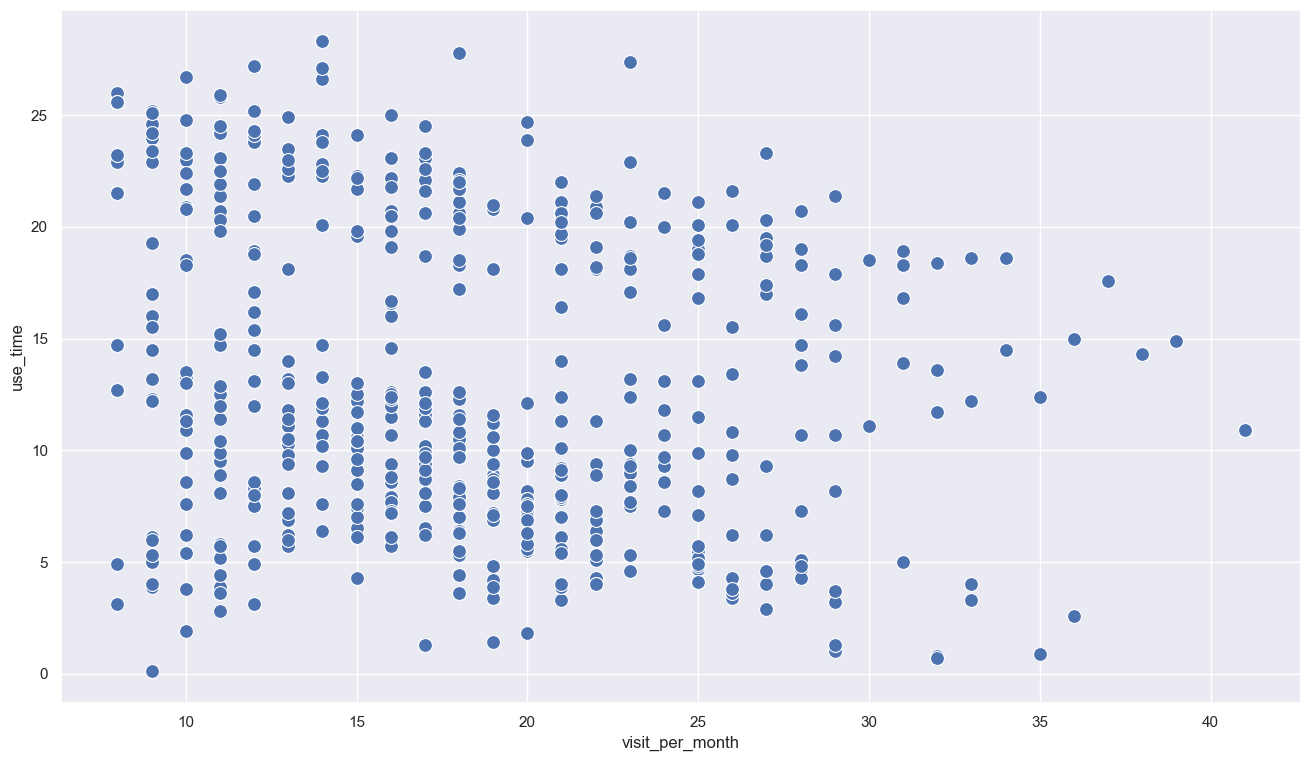

In [2]:
import seaborn as sns

sns.set(style='darkgrid',
        rc={'figure.figsize':(16, 9)})

# 시각화
# s: 점의 크기
sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, s=100, palette='bright')

In [3]:
# 가까이에 있는 데이터를 하나의 클러스터로 묶어 주는 코드
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=123)
model.fit(user_activity)

# 클러스터 구분
user_activity['label'] = model.predict(user_activity)

# 클러스터별 속한 유저 수
user_activity.groupby('label').count()

C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,visit_per_month,use_time
label,,
0,228,228
1,126,126
2,146,146


<Axes: xlabel='visit_per_month', ylabel='use_time'>

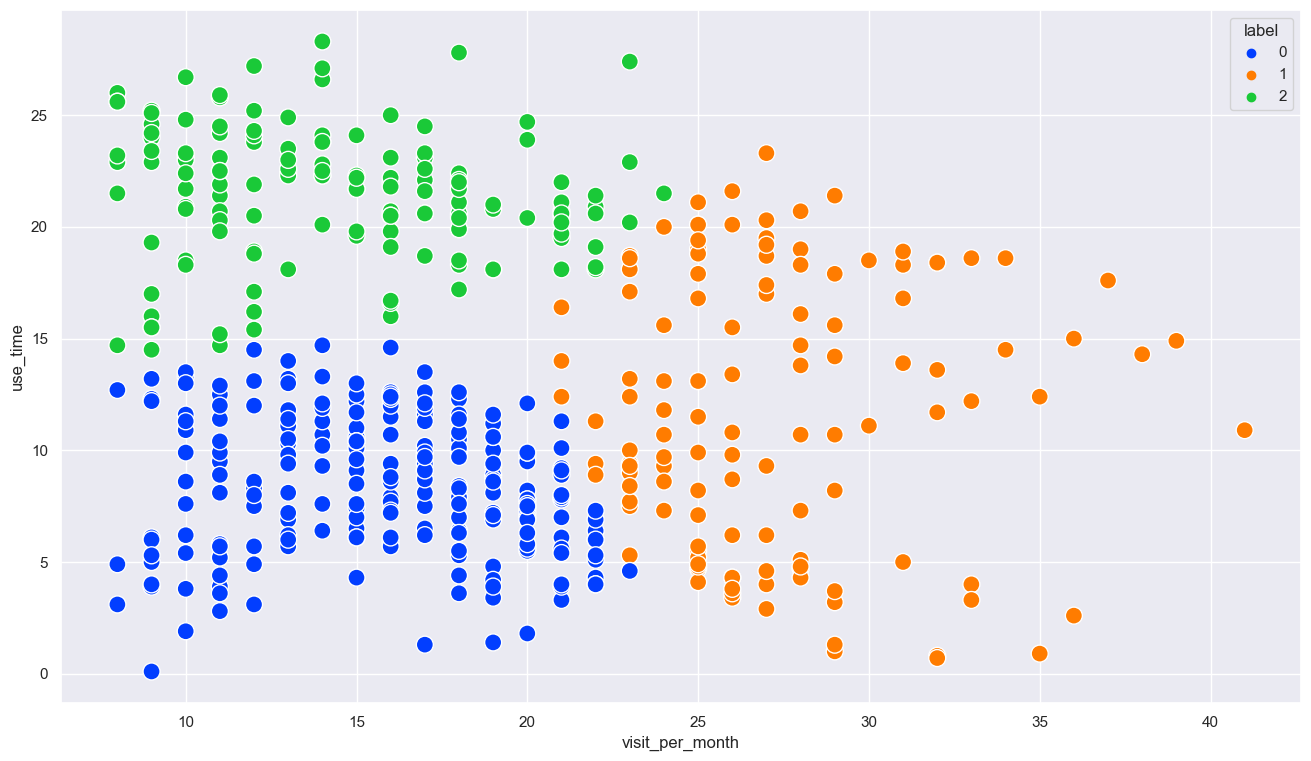

In [4]:
# 시각화
sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, hue=user_activity['label'], s = 150, palette='bright')

먼저, 가장 많은 유저가 포함된 클러스터 0은 방문 횟수와 사용 시간이 둘 다 적은데요. 다수의 유저들이 앱을 많이 사용하지 않고 있다는 뜻이 되겠네요. 해당 클러스터의 유저들이 앱에 좀 더 자주 방문하거나, 사용 시간을 늘릴 수 있도록 대안이 필요할 거 같습니다.

### 클러스터링의 원리

1. 유사한 데이터는 같은 클리스터로 묶는다.
2. 유사하지 않는 데이터는 다른 클러스터로 묶는다

'유사한 데이터'란?   
1. 거리가 가까운 데이터가 유사하다.
- 거리가 가까운 데이터는 같은 클러스터로 묶는다.
- 거라가 먼 데이터는 다른 클러스터로 묶는다.

In [5]:
import pandas as pd

# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format

sales_df = pd.read_csv('data/sales_data.csv', index_col=['customer_id'])

sales_df

,total_buy_cnt,total_price
customer_id,,
12395,99,430250
12427,98,566410
12431,122,849900
12433,625,1180950
12471,10,97750
...,...,...
18144,30,90750
18168,243,1533530
18225,1,91430


<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

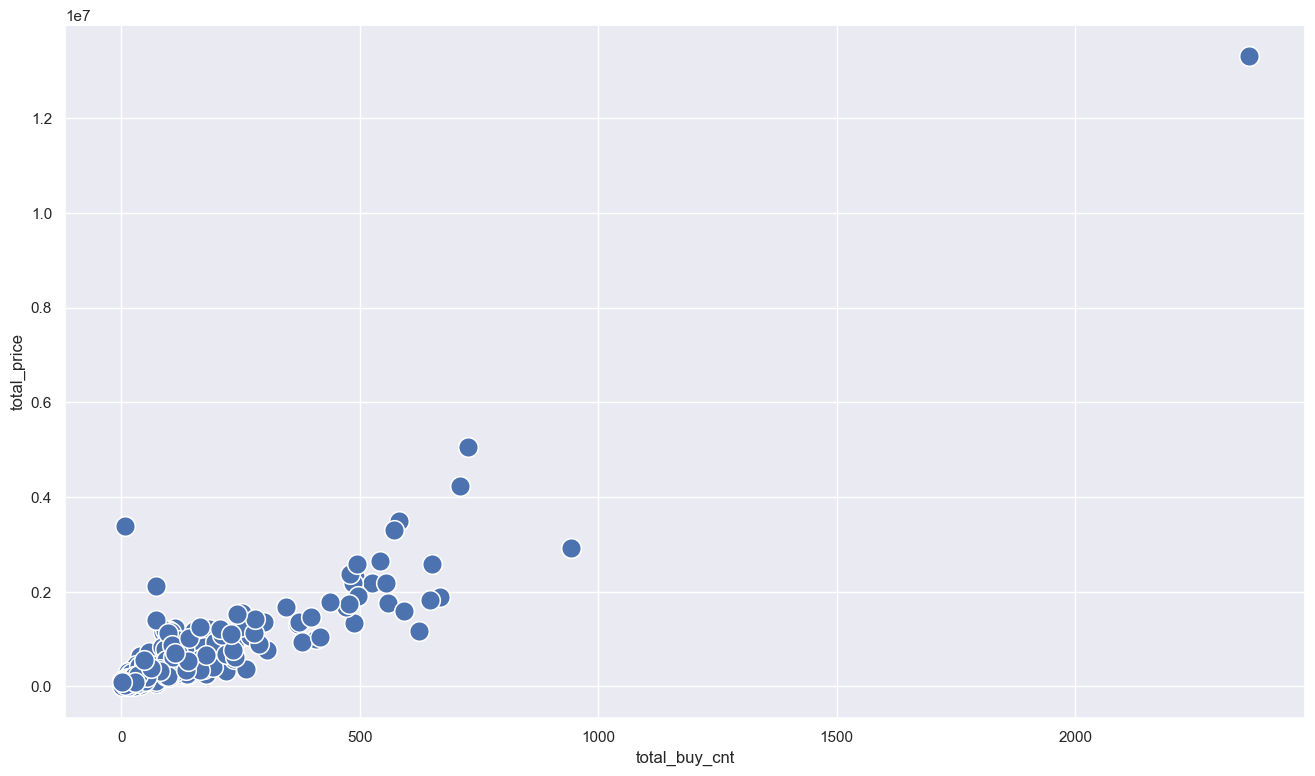

In [6]:
import seaborn as sns

sns.set(style="darkgrid",
        rc={'figure.figsize':(16,9)})

# 데이터 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

In [7]:
# 이상치 제거
def get_outlier_mask(df, weight=1.5):   
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1
    IQR_weight = IQR * weight

    range_min = Q1 - IQR_weight
    range_max = Q3 + IQR_weight

    outlier_per_column = (df < range_min) | (df > range_max)
    
    is_outlier = outlier_per_column.any(axis=1)

    return is_outlier

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

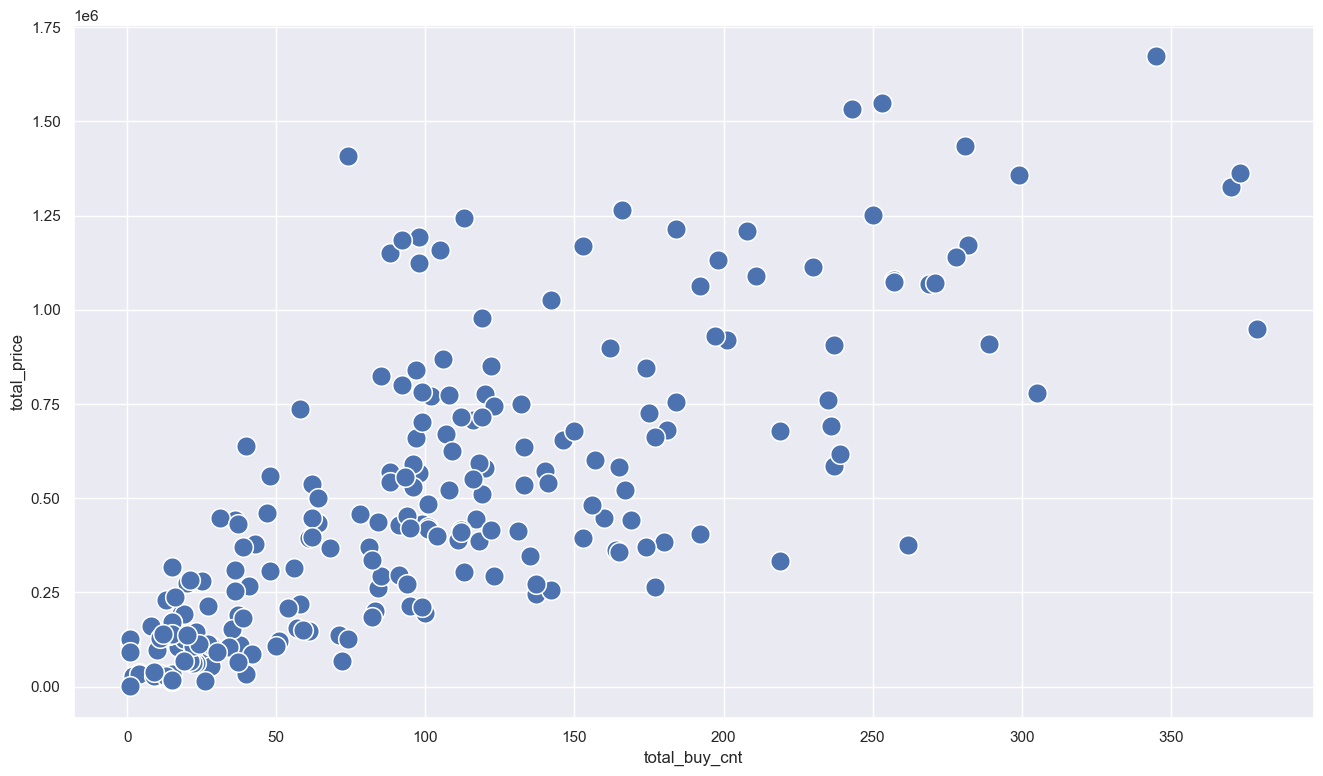

In [8]:
outlier_idx_cust_df = get_outlier_mask(sales_df, weight=1.5)

# 아웃라이어 제거한 데이터 프레임만 추가
sales_df = sales_df[~outlier_idx_cust_df]

# 아웃라이어 제거한 데이터프레임 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

**데이터 표준화**  
데이터를 보면 total_buy_cnt는 단위가 1개이고, 가장 큰 값은 350개입니다. 하지만, total_price는 기본 단위가 10,000원입니다. 두 변수의 단위가 많이 차이나네요.  

이러면 total_price의 영향력이 너무 커져서 결과가 잘못될 가능성이 높습니다. 때문에, 표준화를 통해 변수 단위에 따른 상대적 영향을 제거해야 합니다.

In [9]:
df_mean = sales_df.mean()  # 각 컬럼의 평균값
df_std = sales_df.std()  # 각 컬럼의 표준편차

scaled_df = (sales_df - df_mean)/df_std  # 컬럼별 표준화 진행 

scaled_df.columns = ['total_buy_cnt', 'total_price']

# 인덱스 설정
scaled_df.index = sales_df.index 

scaled_df

,total_buy_cnt,total_price
customer_id,,
12395,-0.05,-0.15
12427,-0.07,0.21
12431,0.23,0.95
12471,-1.13,-1.02
12472,-0.19,0.21
...,...,...
18144,-0.89,-1.04
18168,1.69,2.74
18225,-1.24,-1.04


표준화를 하면 평균이 0, 분산은 1로 값이 조정되어 단위가 통일되는 효과가 있습니다.

### k-means

유사한 데이터는 Centroid(중심점)로부터 가까이에 모여있다.  

- 1단계: Centroid 배치  
먼저, 클러스터의 개수를 의미하는 k를 정해 줘야 합니다. 예시에서는 2로 설정할게요. 그리고, k의 값만큼 Centroid를 생성하여 임의로 배치합니다.  
<br>

- 2단계: 클러스터 형성    
생성한 Centroid와 각 데이터 사이의 거리를 계산하여 가까이에 있는 데이터들을 하나의 클러스터로 묶어줍니다.  
<br>

- 3단계: Centroid 위치 갱신    
클러스터에 속해있는 데이터들의 중심으로 Centroid의 위치를 이동합니다. 이때, 데이터들 사이의 중심을 찾기 위하여 평균값(means)을 사용합니다.  
<br>

- 4단계: 클러스터 재형성  
새롭게 위치한 Centroid를 기준으로 각 데이터와의 거리를 다시 계산하여 가까운 데이터들을 하나의 클러스터로 묶습니다.  
<br>

- 5단계: Centroid 위치 갱신  
새롭게 형성된 클러스터의 중심으로 Centroid를 다시 이동시킵니다.  

예시에서는 두 번 정도 위치를 갱신하니 클러스터가 잘 구분되었네요. 하지만 실제 데이터로 해보면 이렇게 쉽게 되진 않습니다. 최적의 클러스터를 찾을 때까지 위의 단계들을 여러 번 반복하면서 Centroid의 위치를 계속 옮겨 줘야 합니다.

그러다가 k 개의 Centroid가 더 이상 위치를 갱신하지 않게 되면, 그 위치에서 가장 가까운 거리에 있는 데이터들이 하나의 클러스터가 됩니다. 이것이 k-means가 클러스터를 나누는 방식입니다.

데이터 포인트들간의 거리를 측정하는 방식은 일반적으로 유클리드 거리(Euclidean distance)를 사용합니다. 유클리드 거리는 두 점 사이의 직선 거리를 의미하며, 이를 계산하기 위해 두 점의 좌표값을 사용합니다.

예를 들어, 2차원 공간에서 두 점 P(x1, y1), Q(x2, y2) 사이의 유클리드 거리는 다음과 같이 계산됩니다.

√( (x2 - x1)^2 + (y2 - y1)^2 )


이와 같은 유클리드 거리를 사용하여, 각 클러스터의 중심점과 해당 클러스터에 속한 데이터 포인트들간의 거리를 계산합니다. 이를 통해 데이터 포인트를 가장 가까운 중심점이 속한 클러스터로 할당하게 됩니다.

#### 모델과 학습

1. 모델은 넓게 두 가지 의미가 있는데요. 지금까지 사용해왔던 거처럼 그냥 구체적인 분석 방법론을 의미하기도 하고요. 이 분석법을 적용하고, 그 결과물을 저장할 수 있는 프로그램을 의미하기도 합니다.  
<br>

2. 학습은 넓은 의미에서는 그냥 모델에게 데이터를 전달해서, 분석을 시키는 과정입니다.

이걸 합쳐서 우리가 이번 레슨에서 하려는 것처럼 k-means 모델을 학습시킨다는 건, k-means 분석법이 저장된 프로그램에게 분석하길 원하는 데이터를 전달해서 결과물을 저장하겠다는 거죠.

In [10]:
from sklearn.cluster import KMeans

In [11]:
# k-means(k=2)
model = KMeans(n_clusters=2, random_state=123)

1. n_clusters는 클러스터를 몇 개로 나눌지, 즉 k를 몇으로 할지 결정해 주는 파라미터입니다.

참고로, k를 몇으로 하냐에 따라 k-means 모델의 성능이 크게 달라집니다. 그래서 적절한 클러스터의 개수를 구하는게 중요하다.

2. random_state는 여러 번 반복해서 모델을 학습시킬 때 동일한 결과가 나올 수 있도록 해 주는 난수입니다. 

난수 생성은 컴퓨터의 알고리즘에 의해 이루어지는데, 이 초기값을 정해주면 같은 입력에 대해 항상 같은 난수를 생성하게 됩니다! 즉, 초기값을 고정하면 동일한 조건에서 항상 같은 결과를 얻을 수 있어요.

강의에서 설정하는 123은 초기값으로 많이 사용되는 숫자 중 하나이다.

In [12]:
# 모델 학습
model.fit(scaled_df)

C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=123)

먼저, predict()를 활용해 각 데이터가 어떤 클러스터로 구분됐는지 표시합니다. 해당 값을 scaled_df에 새로운 열(label)로 추가할게요.

In [13]:
# label 컬럼 생성
scaled_df['label'] = model.predict(scaled_df)

scaled_df

,total_buy_cnt,total_price,label
customer_id,,,
12395,-0.05,-0.15,0
12427,-0.07,0.21,0
12431,0.23,0.95,1
12471,-1.13,-1.02,0
12472,-0.19,0.21,0
...,...,...,...
18144,-0.89,-1.04,0
18168,1.69,2.74,1
18225,-1.24,-1.04,0


<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

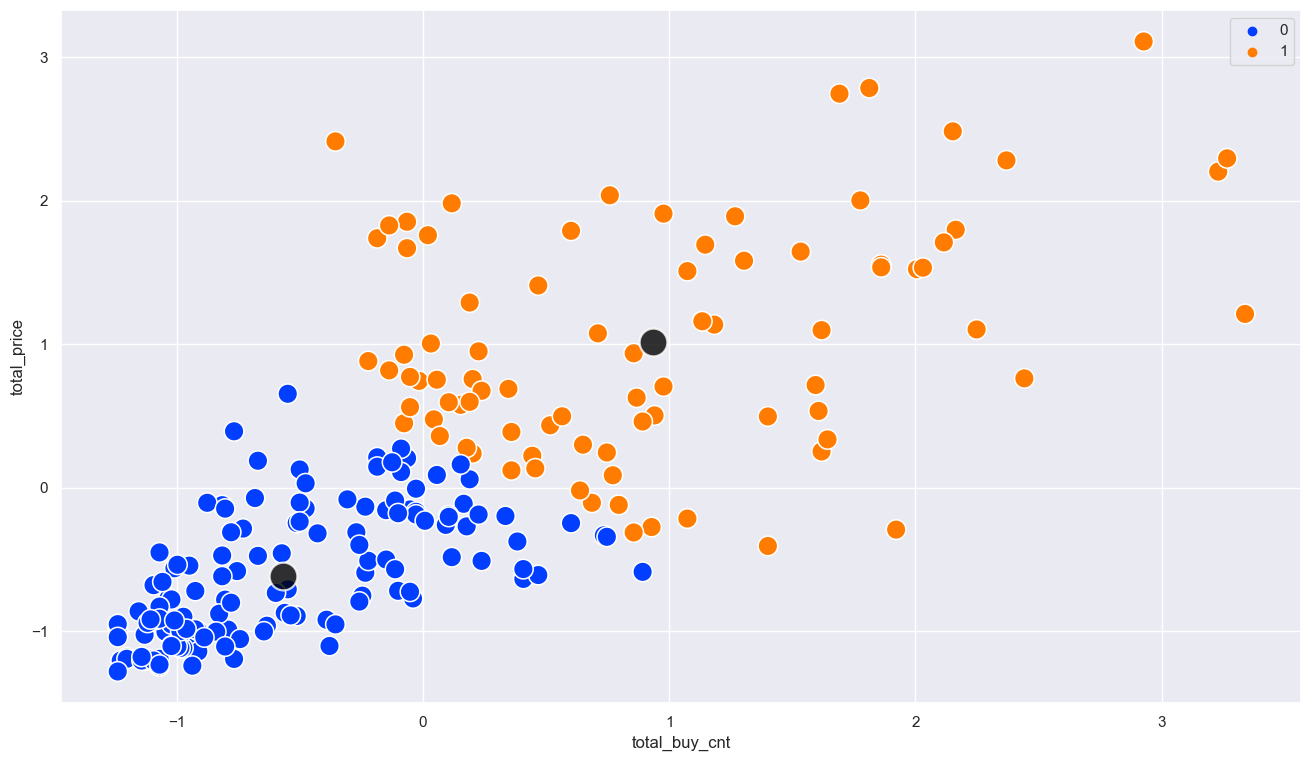

In [14]:
# 각 군집의 중심점
# Centroid는 model.cluster_centers_로 값을 받아옵니다.
centers = model.cluster_centers_

sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], hue=scaled_df['label'], s=200, palette='bright')
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=400)

### 최적의 k 선정 기준

클러스터마다 속한 데이터와 Centroid 사이 거리의 합이 작아야 잘 된 클러스터링이겠네요.  

그걸 확인하기 위해 사용하는 값이 바로 inertia(이너시아)입니다. inertia는 각 클러스터에 속한 데이터들과 Centroid 사이의 거리를 제곱해서 전부 더한 값입니다.  

In [15]:
# inertia 값 확인
print(model.inertia_)

187.06172815569371


#### Elbow Method

In [16]:
# scaled_df에 추가했던 label 열을 제거
scaled_df = scaled_df.drop(['label'], axis=1)

C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

<Axes: >

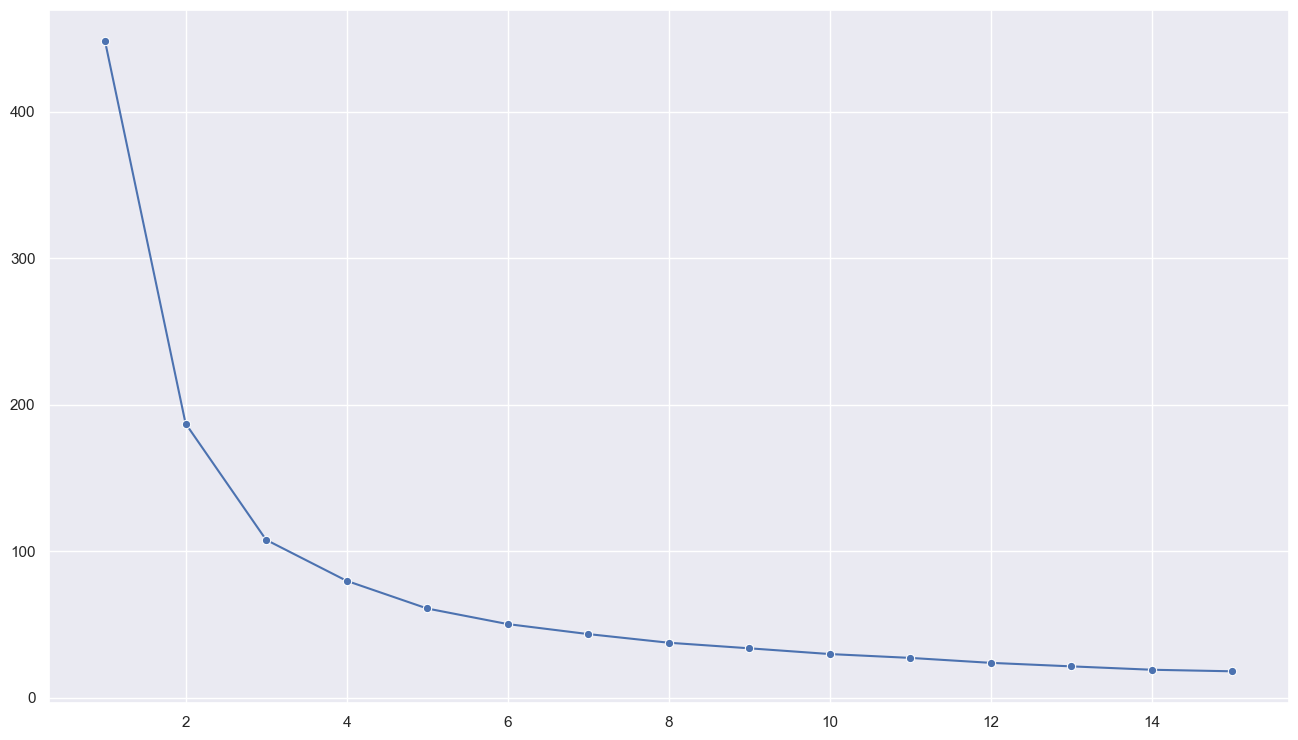

In [17]:
# inertia 값 저장할 리스트
inertias = []     

for k in range(1, 16): # k값의 범위 1~15로 지정
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

# k값에 따른 inertia값 시각화
sns.lineplot(x=range(1, 16), y=inertias, marker='o')

k가 커질수록 inertia는 계속 작아지고 있습니다.

그러면 k가 15일 때가 클러스터링이 가장 잘 된 걸까요? 그렇진 않습니다. inertia는 클러스터의 개수가 늘어날수록 계속 작아집니다. 그러다가, 클러스터가 데이터의 개수만큼 있을 땐 0이 되죠.

하지만, 클러스터의 개수가 많아질수록 클러스터링을 하는 의미가 사라진다고 했었죠? 따라서, inertia가 작다고 무조건 좋은 것은 아닙니다.

최적의 클러스터 개수는 inertia가 충분히 작지만, 분석 목적에 부합하도록 적당해야 합니다. 그리고, 보통 그 지점은 시각화 한 그래프의 기울기가 급격하게 줄어드는 구간으로 정의합니다. 예를 들어 위의 그래프를 보면, k 값이 2~3 사이인 구간에서 기울기가 급격하게 줄어들고 있는데요. 따라서 여기서 최적의 k 값은 2나 3이라고 볼 수 있습니다. 이때 그래프의 모양이 마치 팔꿈치 모양 같다고 해서, 이런 식으로 클러스터 개수를 찾는 방법을 Elbow Method라고 부르죠.

그런데 Elbow Method를 통해 나온 결과를 반드시 따라야 하는 건 아니고요. 그냥 보조 지표 정도로 활용하고, 상황이나 목적에 맞게 클러스터 개수를 조금 다르게 설정해도 괜찮습니다. 예를 들어 고객들을 좀 더 다양한 세그먼트로 나눠서 보고 싶다면, 클러스터를 2개나 3개 대신 5개로 설정할 수도 있겠죠? k 값이 2와 3 사이일 때 이미 기울기가 급격하게 줄어들기는 했지만, 5를 기점으로도 기울기 변화가 거의 없어질 정도로 완만해지고 있다고 볼 수도 있겠네요.

In [18]:
model = KMeans(n_clusters=5, random_state=123)
model.fit(scaled_df)

C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

In [19]:
sales_df['label'] = model.predict(scaled_df)

C:\Users\youji\AppData\Local\Temp\ipykernel_20212\3058466036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['label'] = model.predict(scaled_df)


<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

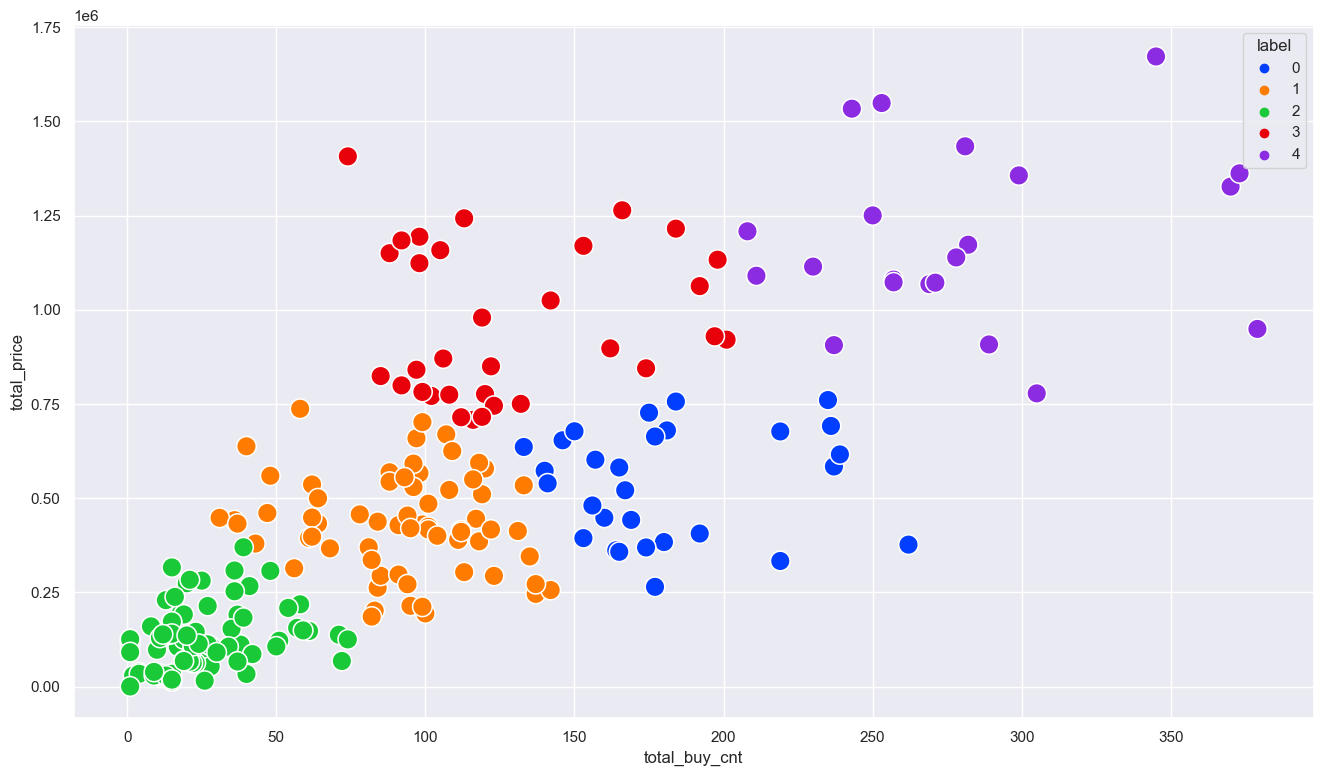

In [20]:
sns.scatterplot(x= sales_df['total_buy_cnt'], y= sales_df['total_price'], hue= sales_df['label'], s=200, palette='bright')

In [21]:
pd.DataFrame(sales_df['label'].value_counts())

,label
2,77
1,66
3,32
0,29
4,21


In [22]:
groupby_df = sales_df.groupby('label').mean()

In [23]:
groupby_df['price_mean'] = groupby_df['total_price'] / groupby_df['total_buy_cnt']
groupby_df

,total_buy_cnt,total_price,price_mean
label,,,
0,181.14,"536,495.17","2,961.80"
1,91.79,"432,910.30","4,716.42"
2,25.64,"127,196.23","4,961.56"
3,127.78,"963,223.12","7,538.06"
4,280.33,"1,192,478.57","4,253.79"


클러스터 4의 고객들은 총 구매 수량과 금액이 가장 많습니다. 하지만, 개당 구매 가격은 적은 편이네요. 해당 클러스터의 고객들은 가격이 낮은 물품을 많이 구매한다는 특징이 있는 걸로 해석할 수 있습니다.  

클러스터 3의 고객들은 총 구매 수량이 많은 편은 아니지만, 구매한 품목의 평균 금액은 높은 편이네요. 수량은 많지 않지만 비싼 물품을 사는 고객들이라는 걸 알 수 있습니다.  

결과를 바탕으로 프로모션을 진행하면 고객 클러스터별 특징에 따라 맞춤 전략을 짤 수 있습니다. 저렴한 물품을 여러 번 구매하면 사은품을 주는 행사는 4번 클러스터 고객들에게, 가격이 높은 제품의 할인 프로모션은 3번 클러스터 고객들에게 진행하면 효과가 더 좋겠죠?

### k-means의 장점

k-means는 변수들에 대한 배경지식, 역할, 영향도에 대해 모르더라도 데이터 사이의 거리만 구할 수 있다면 쉽게 사용할 수 있습니다. 또, 알고리즘이 비교적 쉬운 수식으로 이루어졌기 때문에 이해와 해석이 용이합니다.

이렇게 어떠한 데이터에도 적용하기 쉽고, 모델에 대한 이해와 해석도 간단하게 할 수 있다는 점이 k-means의 장점입니다.  

k-means는 대용량 데이터에 적용하는데 용이하다.

### k-means의 단점

1. 최적의 클러스터 개수인 k를 정하는 게 어렵습니다. 앞에서 배운 Elbow Method로 단서를 얻는 것은 가능하지만, 합리적인 추론을 위한 가이드일 뿐 정답은 아닙니다.
<br>

2. k-means는 이상치에 영향을 많이 받습니다. 이상치가 포함된 데이터일 경우 클러스터의 중심(Centorid)을 업데이트하는 과정에서 Centroid의 위치가 크게 변동되고, 클러스터가 원하지 않는 방식으로 묶일 수 있습니다.  

이상치가 많은 데이터라면 전처리 과정에서 전부 제거해 주거나, 아니면 k-means 말고 다른 모델을 사용하는 게 더 좋겠죠?  

3. k-means는 초기 Centroid가 어떻게 설정되었는지에 따라 결과가 달라집니다. 
<br>

4. 적절하지 않은 곳에 배치되면 위치를 너무 많이 옮겨야 해서 연산이 오래 걸릴 수 있고, 경우에 따라서는 특정한 한곳으로 수렴하지 못하는 경우도 발생할 수 있습니다.

이런 이유 때문에 데이터들 간의 거리를 반영하여 전략적으로 초기 Centroid 위치를 찾아 주는 과정이 필요해졌고, 그래서 k-means++ 모델이 등장했습니다.

k-means++는 Centroid가 좀 더 좋은 위치에 잘 배치되도록 해 줍니다. 때문에 일반 k-means보다 안정적이죠.

In [24]:
# from sklearn.cluster import KMeans
# model = KMeans(n_clusters=k, init='k-means++')

### 차원의 저주란?

변수가 더 많아질수록 모델의 성능은 오히려 나빠질 수 있는데요. 이런 현상을 차원의 저주라고 합니다.

차원이 커질수록 데이터 간의 거리가 멀어지고, 전체 공간에서 데이터가 차지하는 비중은 적어집니다. 그리고, 데이터 간의 거리가 멀어질수록 클러스터링 진행 시 데이터 간 유사성을 계산하는 게 어렵고, 정확성도 떨어지죠.

특히, 거리 기반 모델인 k-means에서는 문제가 더 큽니다. 가까운 데이터와 먼 데이터의 구분이 어려워지기 때문에, 클러스터를 나누는 성능이 저하될 수 있습니다. 때문에, 변수가 너무 많은 데이터를 거리 기반 알고리즘으로 클러스터링 하면 문제가 될 수 있습니다. 이 점 주의해주세요.

### 계층 기반 클러스터링

계층 구조를 바탕으로 클러스터링을 진행하는 방법입니다. 기본적으로 유사한 데이터를 묶은 클러스터들을 층으로 쌓아가며 클러스터링하는 방식인데요.

### 밀도 기반 클러스터링

밀도가 높은 부분을 같은 클러스터로 묶어 나가는 방식입니다. 어떤 데이터가 클러스터에 속할 경우 클러스터 내에 다른 많은 데이터와 가까운 위치에  있을 것이라는 아이디어에서 출발합니다. 밀도 기반 클러스터링은 기하학적인 형태의 데이터를 클러스터링 할 때 효과적입니다.

### 분포 기반 클러스터링

각 클러스터에 포함된 데이터들이 정규분포를 따른다고 가정했을 때, 특정 데이터가 포함될 확률이 가장 높은 분포의 클러스터가 무엇인지를 찾아 클러스터를 나누는 방법입니다.

### 계층적 클러스터링이란?

계층적 클러스터링(Hierachical  Clustering)은 순차적으로 유사한 데이터끼리 같은 클러스터로 묶어 나가는 모델입니다. 데이터를 아래에서부터 묶어 나간다고 해서 Bottom-up 클러스터링이라고도 합니다.  

1. 각 데이터 사이의 거리를 모두 계산하여 가장 가까운 데이터 쌍을 차례대로 묶어갑니다.   
<br>

2. 묶인 데이터 쌍 끼리도 거리를 계산하여, 가까운 쌍은 하나로 묶습니다.  
<br>

3. 모든 데이터가 하나의 클러스터로 묶일 때까지 이 과정을 반복합니다.  
<br>

모든 클러스터의 계층이 구분되어 연결된 이 상태의 그래프를 덴드로그램(Dendrogram)이라고 합니다. 계층적 클러스터링은 이 덴드로그램을 이용해 원하는 개수로 클러스터를 나눌 수 있습니다.

계층을 묶을 때 특정 데이터가 서로 유사하다는 것은 어떻게 정의할 수 있을까요? 다양한 방법이 있는데요. 대표적으로 Ward 거리라는 개념을 많이 사용합니다.

Ward 거리란 각 클러스터의 Center와 속한 데이터들 사이 거리를 제곱하여 더한 값의 증가분을 뜻합니다.

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

In [26]:
# 거리 : ward method
model = linkage(scaled_df, 'ward')

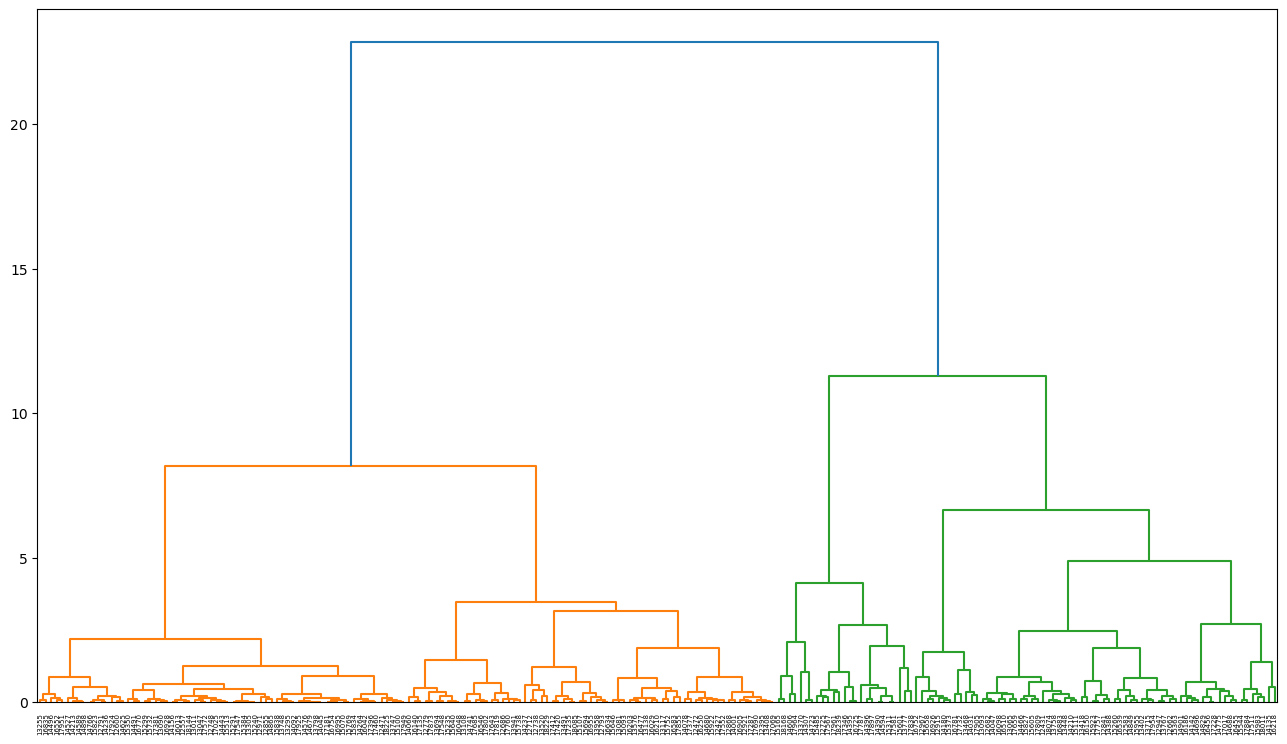

In [27]:
labelList = scaled_df.index 

# 덴드로그램 사이즈와 스타일 조정
plt.figure(figsize=(16,9))
plt.style.use("default")

dendrogram(model, labels=labelList)
plt.show()

In [28]:
cluster_num = 5

# 고객별 클러스터 라벨 구하기
scaled_df['label'] = cut_tree(model, cluster_num)

pd.DataFrame(scaled_df['label'].value_counts())

,label
0,67
2,67
1,54
3,25
4,12


<Axes: xlabel='total_price', ylabel='total_buy_cnt'>

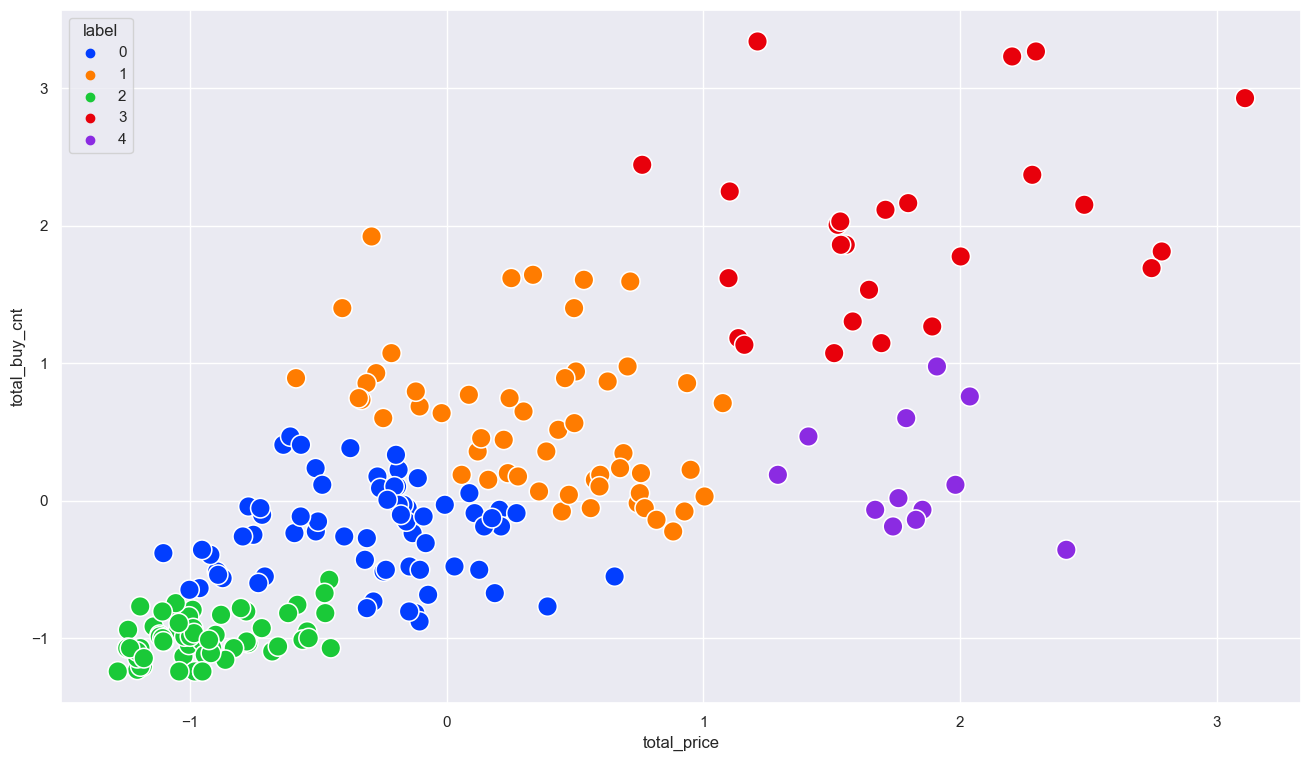

In [29]:
sns.set(style="darkgrid",
        rc = {'figure.figsize':(16,9)})

# 계층적 클러스터링
sns.scatterplot(x=scaled_df['total_price'], y=scaled_df['total_buy_cnt'], hue=scaled_df['label'], s=200, palette='bright')

### 계층적 클러스터링 장단점

계층적 클러스터링의 가장 큰 장점은 모델을 학습시킬 때 클러스터의 개수를 미리 가정하지 않아도 된다는 점입니다.

k-means는 사전에 정한 k 값에 따라 결과가 달라졌지만, 계층적 클러스터링은 클러스터의 개수에 상관 없이 모델을 학습시킬 수 있습니다.

앞선 예시에서 봤듯이 덴드로그램의 어떤 계층에서 데이터를 구분해 주냐에 따라 클러스터의 개수가 조절됐었죠? 때문에, 클러스터의 개수를 몇 개로 해야할 지 모를 때 유용하게 사용할 수 있습니다.

하지만, 계층적 클러스터링은 모든 데이터끼리의 거리를 반복해서 계산해야 하기 때문에 많은 연산이 필요합니다. 예를 들어 천 개의 데이터를 가지고 있다면 그 제곱인 백 만번의 연산이 필요합니다. 때문에 학습 속도가 느리고 대용량 데이터에 적용이 어렵다는 단점이 있습니다.

### DBSCAN이란?

DBSCAN은 Density-Based Spatial Clustering of Applications with Noise의 줄임말입니다. 영어 표현 그대로 밀도 기반 클러스터링 방법인데요. DBSCAN의 전제는 다음과 같습니다.

어떤 데이터가 특정 클러스터에 속할 경우, 클러스터 내의 다른 데이터들과 가까운 위치에 있어야 한다.
위에서 다른 많은 데이터와 가까운 위치라는 표현이 나오는데요. DBSCAN은 이 두 가지를 통해 클러스터를 구분합니다.

그렇다면, 얼마나 많은 데이터와 얼마나 가까운 위치에 있어야 하나의 클러스터로 분류될까요?

이 두 가지는 모델 학습 시 임의로 지정해 줘야 하는 값입니다. 얼마나 가까운 위치에 데이터가 있어야 하는지 나타내는 반경(Radius), 반경 내에 얼마나 많은 데이터가 있어야 하는지를 나타내는 최소 데이터 개수(Minimum Points)를 어떻게 지정해 주느냐에 따라 결과가 달라집니다.

1. 특정 데이터에서 지정한 반경 내에 몇 개의 데이터가 포함되는지 탐색합니다.
<br>

2. 정해진 반경 내에 최소 데이터 개수가 포함되면 하나의 클러스터로 묶습니다. 만약에, 최소 데이터 개수가 4개라고 하면 아래 이미지에서는 두 개의 클러스터가 생기게 됩니다.
<br>

3. 만들어진 두 개의 클러스터의 경계에 있는 데이터들에서 그린 반경이 서로 겹치는 경우가 생길 수 있는데요. 그럴 경우에는 두 클러스터를 하나로 묶습니다.
<br>

4. 조건에 만족하지 못하고 어떠한 클러스터에도 포함되지 못한 데이터는 이상치(Outlier)가 됩니다.

k-means는 이상치가 Centroid 위치에 관여하면서 결과에 영향을 끼쳤는데요. DBSCAN은 기준에 포함되지 못하는 데이터를 제외하기 때문에 이상치에 강건(Robust)한 방법입니다.

또, 데이터의 밀도에 따라 클러스터를 만들기 때문에 복잡하거나 기하학적인 형태를 가진 데이터 세트에 효과적입니다.

반면, 고차원 데이터일수록 데이터 간 밀도를 계산하기 어렵고, 연산이 많아져 학습 속도가 느려질 수 있다는 단점도 있습니다.

<Axes: xlabel='0', ylabel='1'>

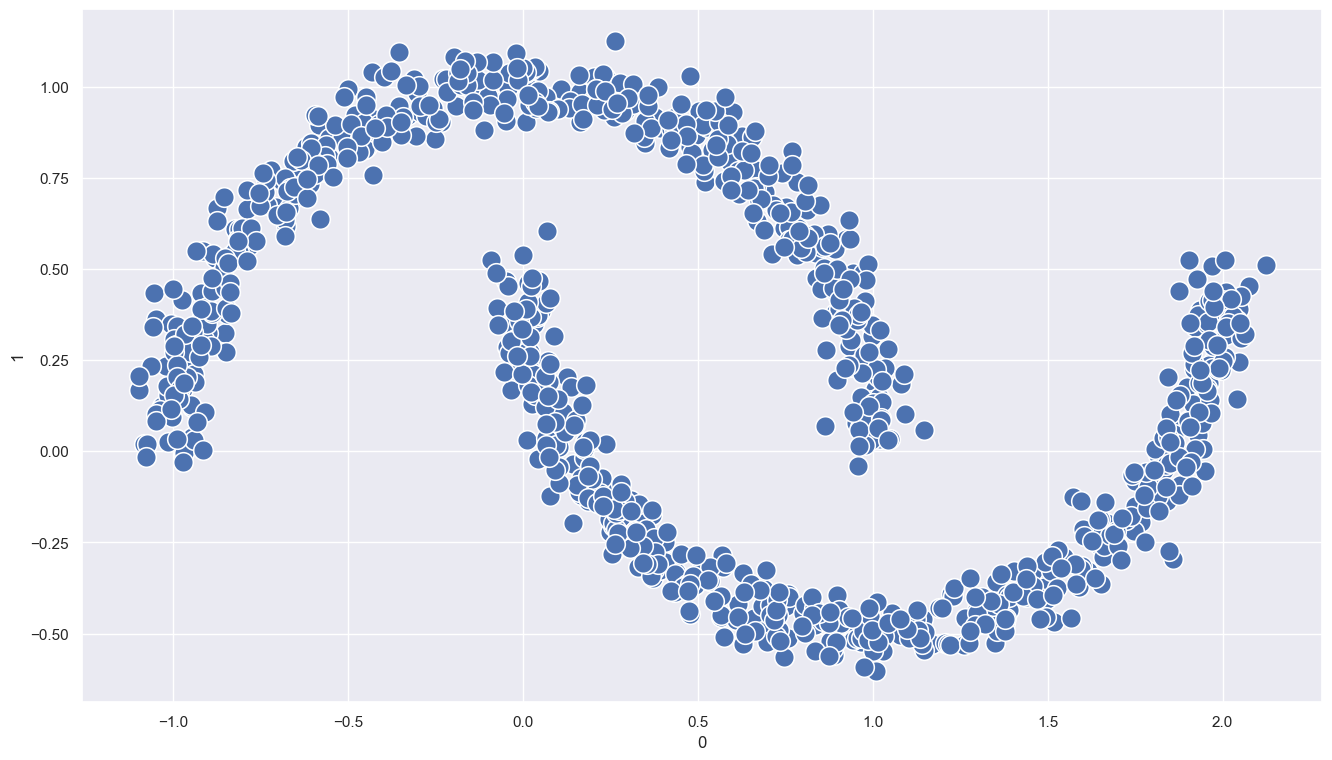

In [30]:
from sklearn.datasets import make_moons
import numpy as np

n_samples = 1000
np.random.seed(3)
X, y = make_moons(n_samples=n_samples, noise=.05)  # noise: 잡음의 크기. 0이면 정확한 반원을 이룸
df = pd.DataFrame(X)

#시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], marker='o', s=200)

C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='0', ylabel='1'>

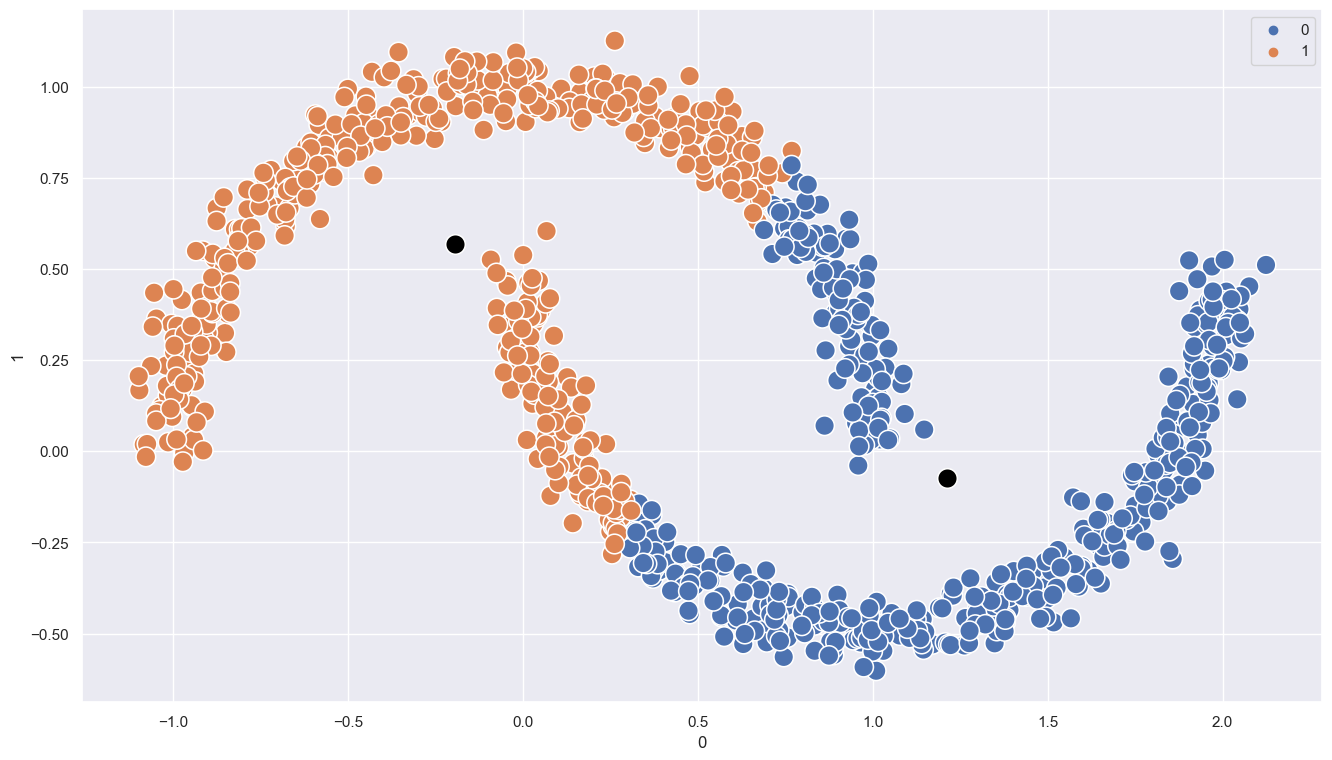

In [31]:
# k-means 모델 학습
model = KMeans(n_clusters=2, random_state = 123)
model.fit(df)

# 클러스터 라벨링
df['kmeans_label'] = model.predict(df)

# 각 군집의 중심점
centers = model.cluster_centers_

# 클러스터링 결과 시각화
plt.figure(figsize=(16, 9))

sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'] , s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', s=200)

In [32]:
df = df.drop(columns=['kmeans_label'], axis=1)

<Axes: xlabel='0', ylabel='1'>

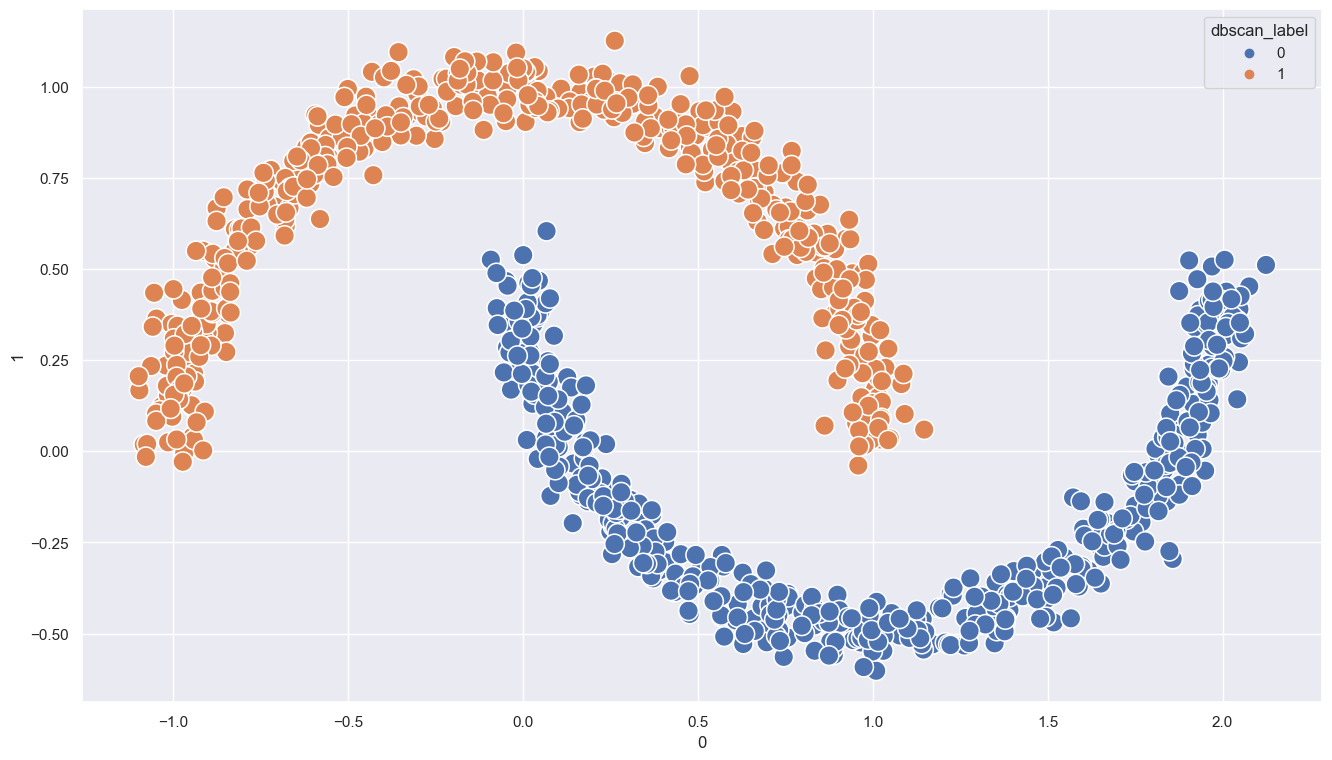

In [33]:
from sklearn.cluster import DBSCAN

eps = 0.1 # 반경
min_samples = 5 # 최소 데이터 갯수

# DBSCAN 모델 학습
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)
df['dbscan_label'] = model.labels_

# 시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], hue=df['dbscan_label'], s=200)

DBSCAN은 기하학적인 분포의 데이터를 클러스터링하는데 유용합니다.

### GMM이란?

GMM(Gaussian Mixture Model)은 데이터가 서로 다른 k 개의 정규분포에서 생성되었다고 가정합니다. 정규분포란 평균을 중심으로 대칭이며 표준편차에 따라 흩어진 정도가 정해지는 분포를 뜻하는데요.

데이터가 정규 분포를 따를 때 가장 큰 이점은 값이 특정 구간에 속할 확률을 계산할 수 있다는 점입니다. GMM은 이 확률을 통해서 클러스터를 구분합니다.

특정 데이터의 값이 어떤 분포에 포함될 확률이 더 큰지를 따져서 각 클러스터로 구분하는 게 GMM의 방법론입니다.

GMM은 클러스터별로 중심(평균)을 표현하면서 분산의 구조도 함께 띄고 있는 데이터 세트에 효과적입니다.

예를 들어서, 데이터가 원형으로 흩어져 있으면 평균은 있지만 분산이 없는 데이터라고 할 수 있는데요. 이런 경우에는 k-means를 사용하는 게 더 적합하겠죠?

반면, 데이터가 타원형으로 흩어져 있다면 중심(평균)과 분산의 값을 갖는 형태이기 때문에, 이러한 상황에서는 GMM 모델을 적용하는 게 적합합니다.

하지만, GMM의 단점도 있습니다.

1. k-means와 비슷하게 사전에 클러스터 개수를 임의로 설정해야 하며, 그 값에 따라서 결과가 달라질 수 있습니다.
<br>

2. 특정 분포에 할당되는 데이터 수가 적으면 모수 추정이 잘 이뤄지지 않기 때문에, 충분히 많은 수의 데이터가 있지 않으면 적용하기 어렵습니다.
<br>

3. 정규 분포를 따른다고 가정하는 데이터를 구분해 주는 방법이기 때문에, 정규 분포가 나올 수 없는 범주형 데이터는 다룰 수 없습니다.

<Axes: xlabel='0', ylabel='1'>

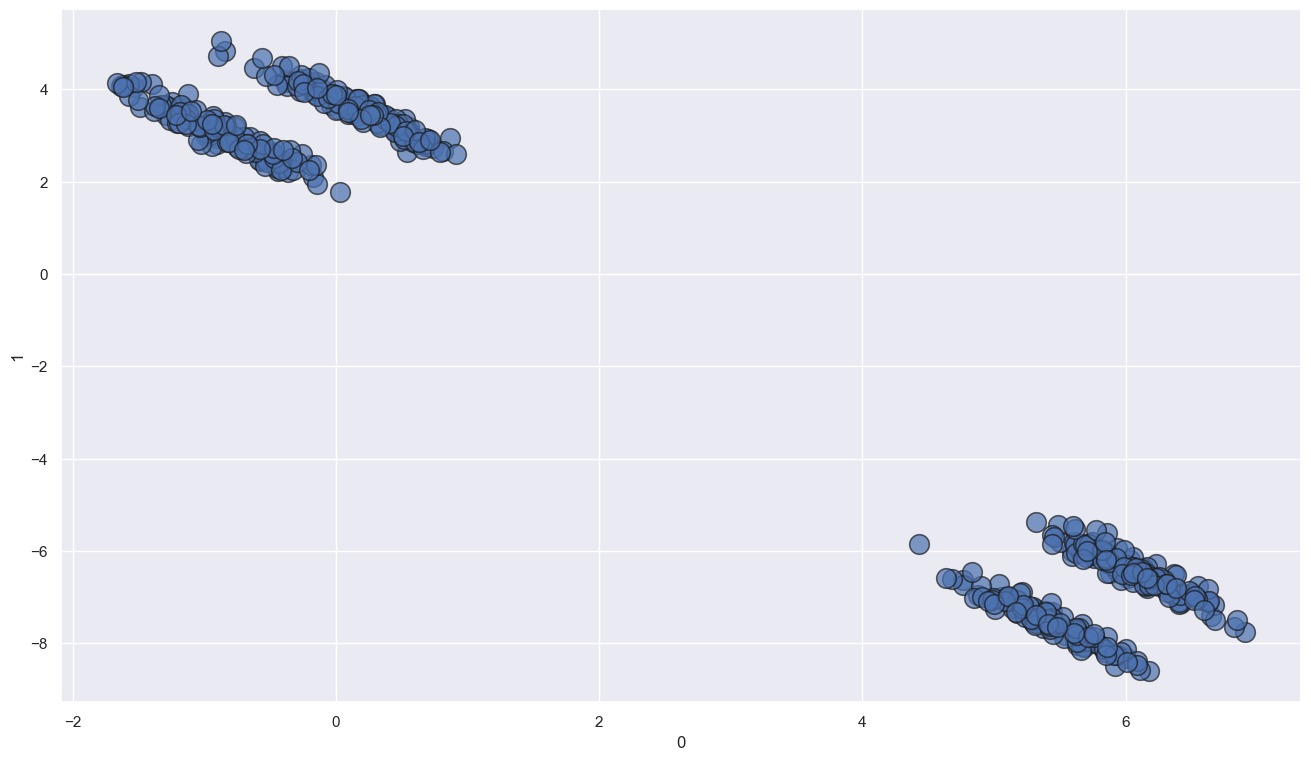

In [34]:
from sklearn.datasets import make_blobs

n_samples = 500   # 샘플 데이터 개수
centers = 4   # 클러스터 개수
cluster_std = 0.5  #0.75   # 클러스터 내 표준편차
random_state = 13   # 샘플 데이터 고정
 
data, clusters = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

# 데이터 타원형으로 만들기
tf = [[0.6, -0.6], [-0.4, 0.8]]
data_tf = data @ tf  # @ : 행렬의 곱을 나타냄
df = pd.DataFrame(data_tf)

# 시각화
sns.scatterplot(x=df[0], y=df[1], alpha = 0.7, edgecolor="k", s=200)

C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

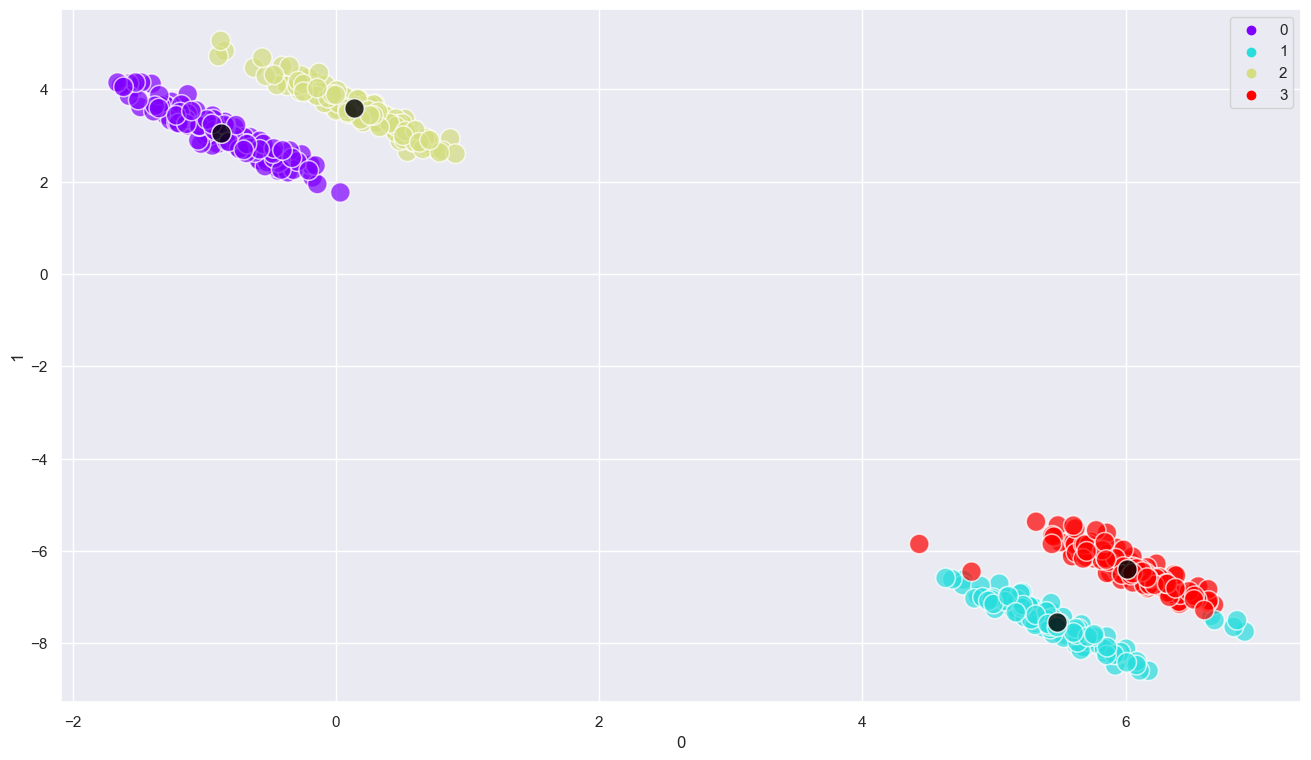

In [35]:
# k-means 학습
model = KMeans(n_clusters=4, random_state=123)
model.fit(df)
df['kmeans_label'] = model.predict(df)
centers = model.cluster_centers_ # 각 클러스터의 Centorid

# 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], palette='rainbow', alpha=0.7, s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=200)

In [36]:
df = df.drop(columns=['kmeans_label'], axis=1)

C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

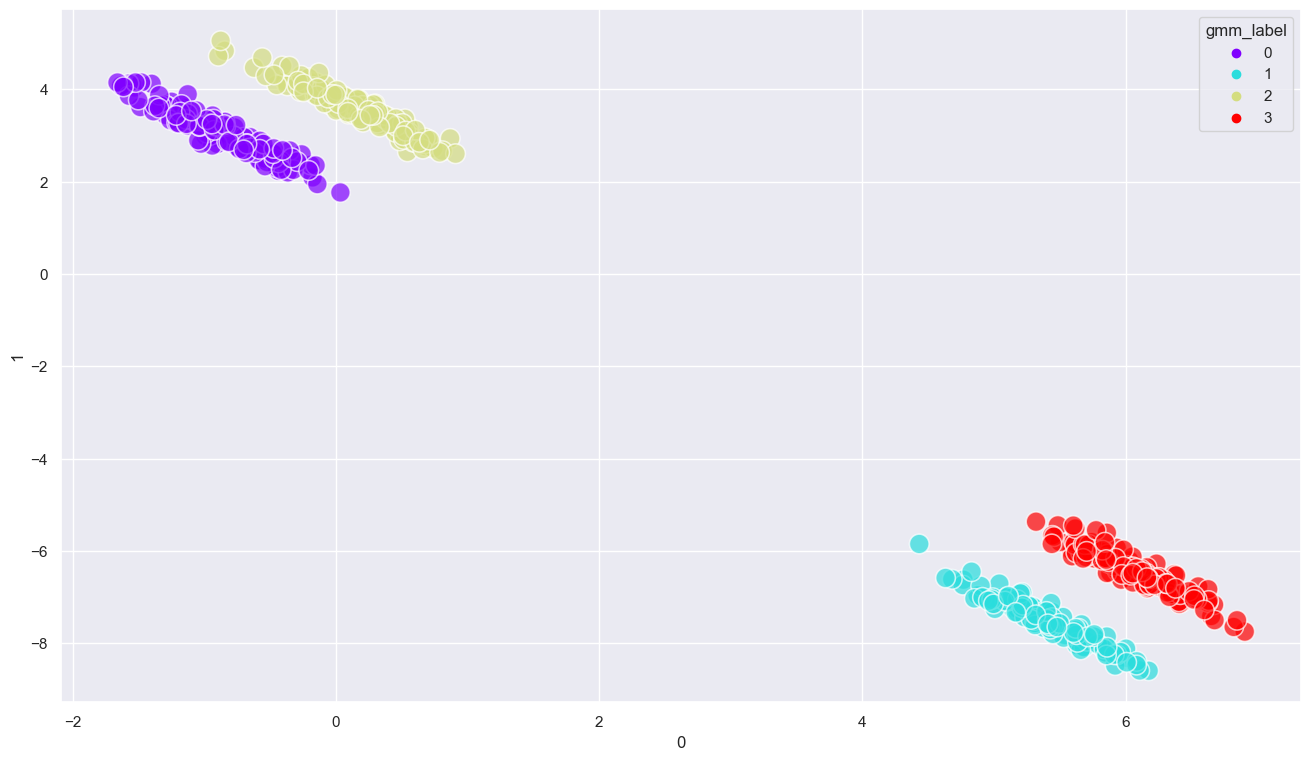

In [37]:
from sklearn.mixture import GaussianMixture

n_components = 4    # 분포 개수
random_state = 10   # 모델 고정

model = GaussianMixture(n_components=n_components, random_state=random_state)

# GMM 모델 학습
model.fit(df)
df['gmm_label'] = model.predict(df)

# 시각화
sns.scatterplot(x=df[0], y=df[1],  hue=df['gmm_label'], palette='rainbow', alpha=0.7, s=200)

클러스터링은 머신러닝 기법 중 비지도 학습에 해당합니다.  
비지도 학습은 정답(레이블)을 주지 않은 상태에서 데이터의 특성만 가지고 스스로 규칙을 찾아내는 방식입니다.

### 클러스터링과 분류(Classification)

데이터들의 특성을 바탕으로 특정 범주로 구분해 주는 분류(Classification) 문제도 있습니다.

예를 들어서, 100명의 학생이 공부한 시간과 시험에 통과했는지 여부를 체크한 데이터가 있다고 해 볼게요. 이 데이터를 바탕으로, 새로운 학생이 몇 시간 공부했는지에 따라 시험에 통과할 수 있을지를 예측해 볼 수 있겠죠?

해당 상황에서는 구분하고 싶은 정답(시험 통과 여부)이 데이터에 이미 존재합니다. 그리고, 변수(공부 시간)와 정답 사이의 규칙성을 모델이 미리 학습하여 새로운 데이터를 합격과 불합격 범주 중 하나로 분류하는 것인데요.

데이터에 미리 정답 레이블이 있는 상태로 모델을 학습시키기 때문에, 이 경우는 지도 학습에 해당됩니다.

클러스터링과 분류는 데이터의 특성에 따라 범주를 구분한다는 점이 유사합니다.

하지만, 클러스터링은 정답이 없는 상황에서 순수하게 데이터의 특성만으로 구분하고, 분류는 데이터의 특성과 정답 사이의 관계를 학습하여 새로운 데이터가 어떤 범주에 해당할지 구분합니다.

이러한 방식의 차이 때문에 둘의 결과에도 차이가 있는데요. 분류 모델의 결과는 특정한 범주에 할당됩니다. 위의 예시에서도, 공부 시간에 따른 결과가 ‘합격’ 또는 ‘불합격’으로 정해지겠죠?

하지만 클러스터링은 데이터들이 특정 클러스터에 할당될 뿐, 그 클러스터가 무엇을 의미하는지가 함께 결과로 나오진 않습니다. 해당 클러스터가 무엇을 의미하는지는 분석하는 사람이 별도로 해석해야 하죠.

이렇게, 데이터의 특성에 따라 적용하는 방법이 다르기 때문에 어떤 상황에서 어떤 방법론을 적용해야 할지 잘 판단해야 합니다.